In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
from sklearn.preprocessing import StandardScaler

In [2]:
from plotly import __version__
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import pandas as pd

path = r"C:\Users\HP\Documents\DE\Airlines Data\DA_Airline.csv"
df_Train = pd.read_csv(path)
df_Train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df_Train.shape

(103904, 25)

In [5]:
df_Train.info()  #checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df_Train["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [7]:
#Finding the missing values
df_Train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
#we have missing values in the "Arrival Delay in Minutes" column

In [9]:
#Percentage of null values in every column
df_Train.isnull().sum()/df_Train.shape[0]*100


Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [10]:
#Since the missing values is only 0.29% hence we are removing the null values

In [11]:
df2_Train = df_Train.dropna(subset=['Arrival Delay in Minutes'])

In [12]:
df2_Train.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [13]:
#df_Train is now stored to df2_Train with no null values

In [14]:
#Performing the same with Test dataset

In [15]:
import pandas as pd

path = r"C:\Users\HP\Documents\DE\Airlines Data\DA_Airline_test.csv"
df_Test = pd.read_csv(path)
df_Test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [16]:
df_Test.shape

(25976, 25)

In [17]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [18]:
df_Test["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64

In [19]:
#Finding the missing values
df_Test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [20]:
#we have missing values in the "Arrival Delay in Minutes" column

In [21]:
#Percentage of null values in every column
df_Test.isnull().sum()/df_Test.shape[0]*100


Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [22]:
#Since the missing values is only 0.31% hence we are removing the null values

In [23]:
df2_Test = df_Test.dropna(subset=['Arrival Delay in Minutes'])

In [24]:
df2_Test.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [25]:
#df_Test is now stored to df2_Test with no null values

In [26]:
categorical_vars = ['Gender','Customer Type','Type of Travel','Class','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']

In [27]:
def plot_categorical_variables(categorical_vars, data):
    num_categorical_vars = len(categorical_vars)

   
    num_rows = (num_categorical_vars + 1) // 2  
    num_cols = 2

   
    fig_height = num_rows * 5 
    fig_width = 15 


    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))


    for i, var in enumerate(categorical_vars):
        row = i // num_cols
        col = i % num_cols
        counts = data[var].value_counts()
        counts.plot(kind='bar', ax=axes[row, col])
        axes[row, col].set_title(f'Distribution of {var}', fontsize=14)
        axes[row, col].set_ylabel('Count', fontsize=12)
        axes[row, col].set_xlabel('', fontsize=12)  
        axes[row, col].tick_params(axis='x', labelrotation=0)
        axes[row, col].tick_params(axis='both', labelsize=12) 
        for index, value in enumerate(counts):
            axes[row, col].text(index, value + 10, str(value), ha='center', va='bottom', fontsize=11)  

   
    if num_categorical_vars % 2 != 0:
        fig.delaxes(axes[num_rows - 1, 1])

    plt.tight_layout()
    plt.show()

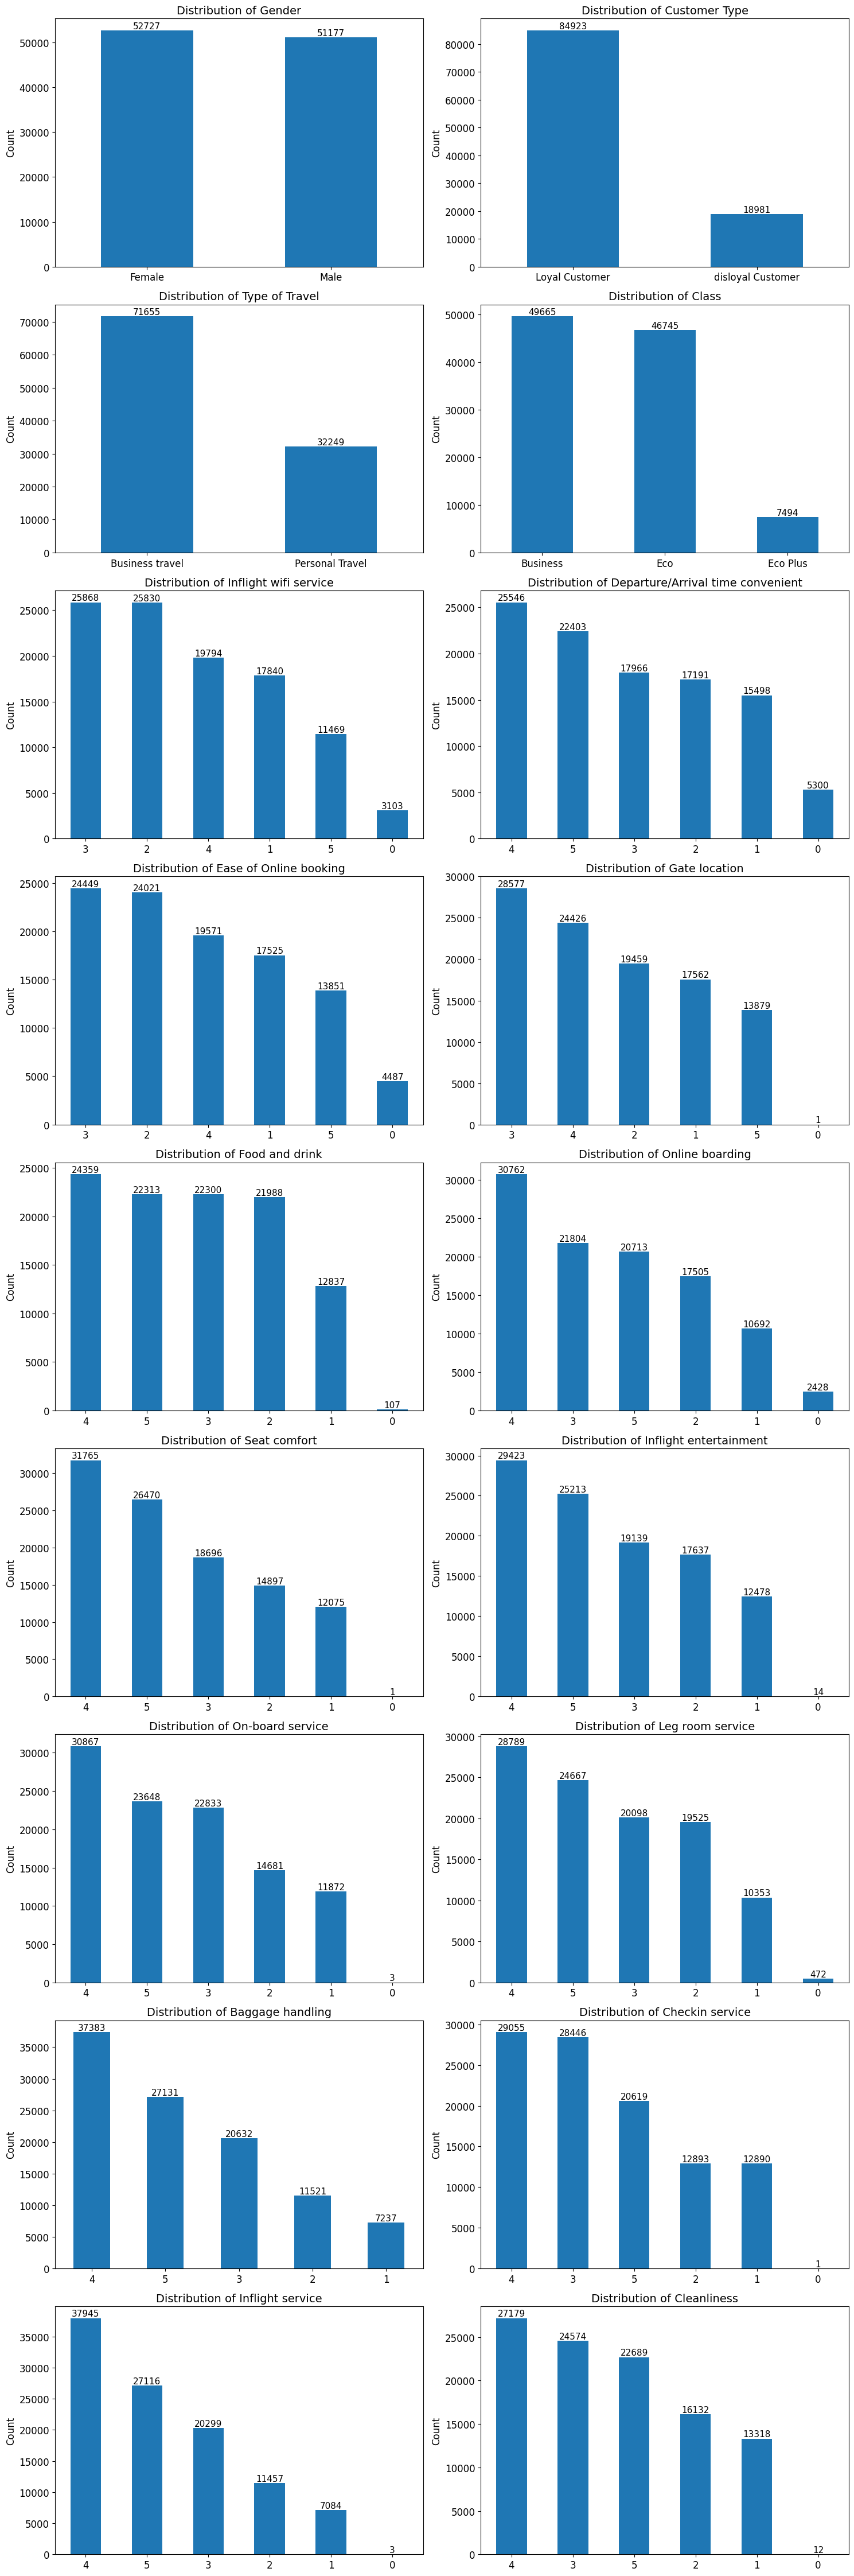

In [29]:
plot_categorical_variables(categorical_vars,df_Train)

In [28]:
#Target Variable= satisfaction column

##Checking for Imbalance

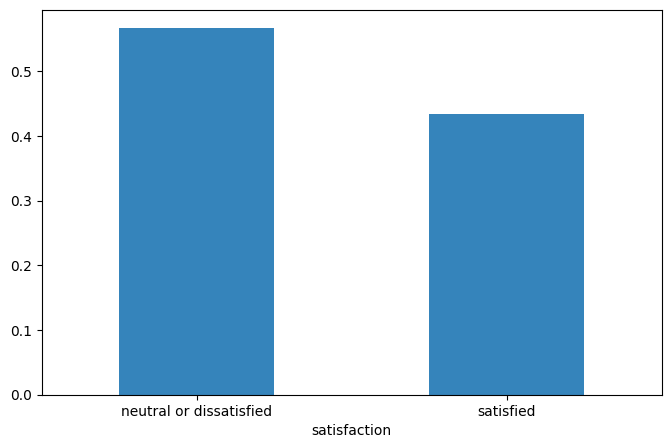

In [29]:
fig = plt.figure(figsize = (8,5))
df2_Train.satisfaction.value_counts(normalize = True).plot(kind='bar', alpha = 0.9, rot=0)
plt.show()

In [30]:
df2_Train["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

In [31]:
# The above plot shows a distribution of around 55%:45% between neutral/dissatisfied passengers and satisfied passengers respectively.
#So the data is quite balanced and it does not require any special treatment/resampling.

In [32]:
#There are two columns Unnamed: 0 and id,These two columns add no value to classification model, Hence we remove it

In [33]:
df2_Train.drop(['Unnamed: 0','id'],axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10816\1278790529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_Train.drop(['Unnamed: 0','id'],axis=1,inplace=True)


In [34]:
df2_Train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [35]:
df2_Train.columns = [c.replace(' ', '_') for c in df2_Train.columns]

In [36]:
df2_Test.columns = [c.replace(' ', '_') for c in df2_Test.columns]

In [37]:
#on the above two steps we have replaces the blanks in the column names with "_" so that model dosent have any misunderstanding

In [38]:
df2_Train.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [39]:
df2_Test.columns

Index(['Unnamed:_0', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [40]:
df2_Test.drop(['Unnamed:_0','id'],axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10816\2939611551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_Test.drop(['Unnamed:_0','id'],axis=1,inplace=True)


In [41]:
df2_Test.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [42]:
#Identify 5 common trends/myths/observations

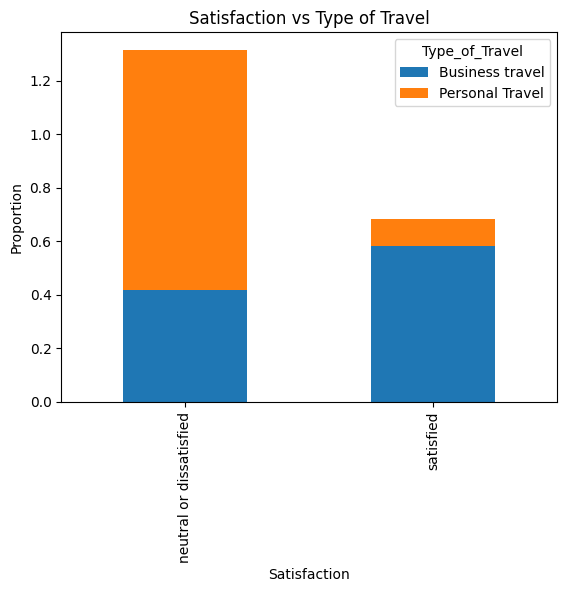

In [43]:
# Cross-tabulation of satisfaction and type of travel
satisfaction_type_of_travel = pd.crosstab(df2_Train['satisfaction'], df2_Train['Type_of_Travel'], normalize='columns')
satisfaction_type_of_travel.plot(kind='bar', stacked=True)
plt.title('Satisfaction vs Type of Travel')
plt.xlabel('Satisfaction')
plt.ylabel('Proportion')
plt.show()

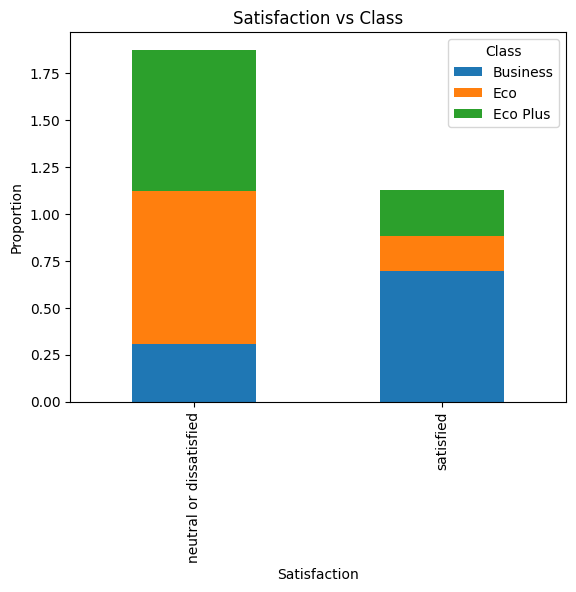

In [44]:
# Cross-tabulation of satisfaction and class
satisfaction_class = pd.crosstab(df2_Train['satisfaction'], df2_Train['Class'], normalize='columns')
satisfaction_class.plot(kind='bar', stacked=True)
plt.title('Satisfaction vs Class')
plt.xlabel('Satisfaction')
plt.ylabel('Proportion')
plt.show()


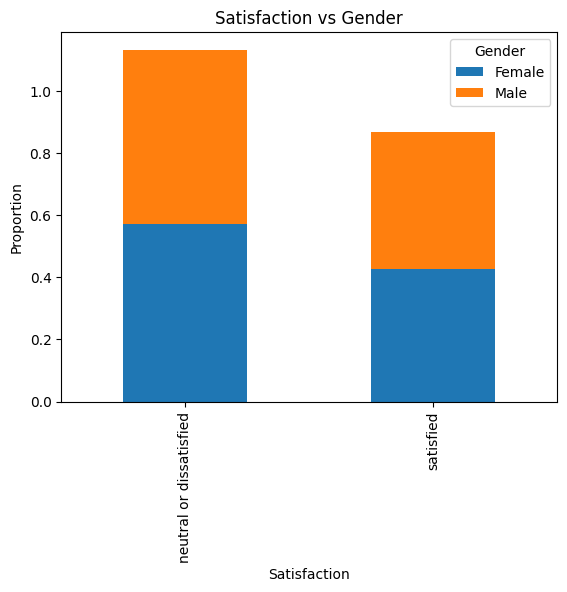

In [45]:
# Cross-tabulation of satisfaction and gender
satisfaction_gender = pd.crosstab(df2_Train['satisfaction'], df2_Train['Gender'], normalize='columns')
satisfaction_gender.plot(kind='bar', stacked=True)
plt.title('Satisfaction vs Gender')
plt.xlabel('Satisfaction')
plt.ylabel('Proportion')
plt.show()


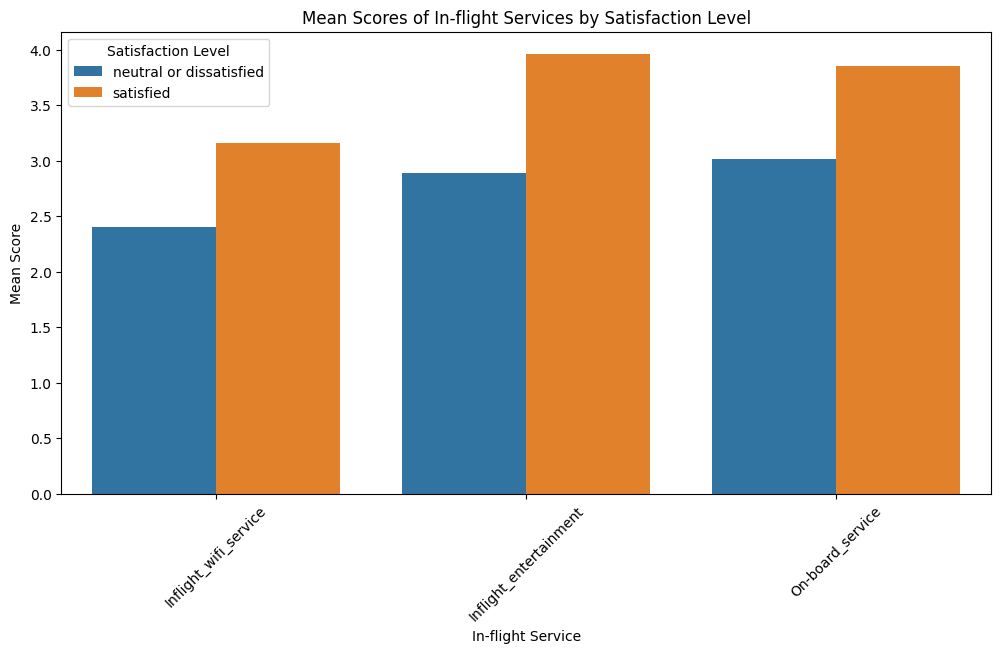

In [46]:

inflight_services = ['Inflight_wifi_service', 'Inflight_entertainment', 'On-board_service']


mean_scores = df2_Train.groupby('satisfaction')[inflight_services].mean().reset_index()


mean_scores_melted = mean_scores.melt(id_vars='satisfaction', var_name='Service', value_name='Mean Score')


plt.figure(figsize=(12, 6))
sns.barplot(data=mean_scores_melted, x='Service', y='Mean Score', hue='satisfaction')
plt.title('Mean Scores of In-flight Services by Satisfaction Level')
plt.ylabel('Mean Score')
plt.xlabel('In-flight Service')
plt.legend(title='Satisfaction Level')
plt.xticks(rotation=45)
plt.show()


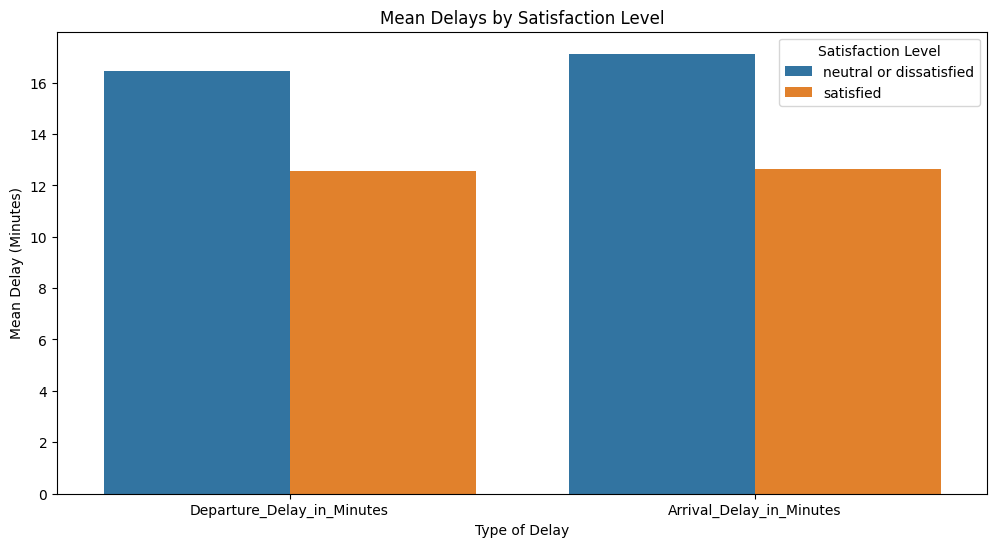

In [47]:

mean_delays = df2_Train.groupby('satisfaction')[['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']].mean().reset_index()
mean_delays_melted = mean_delays.melt(id_vars='satisfaction', var_name='Delay Type', value_name='Mean Delay')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_delays_melted, x='Delay Type', y='Mean Delay', hue='satisfaction')
plt.title('Mean Delays by Satisfaction Level')
plt.ylabel('Mean Delay (Minutes)')
plt.xlabel('Type of Delay')
plt.legend(title='Satisfaction Level')
plt.show()

In [48]:
from scipy.stats import chi2_contingency

#Null hupothesis H0: There is no significant association between Type of Travel and Satisfaction.
#Alt Hupothesis Ha: There is a significant association between Type of Travel and Satisfaction.

contingency_table = pd.crosstab(df2_Train['Type_of_Travel'], df2_Train['satisfaction'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}, p-value: {p:.6f}")

if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between Type of Travel and Satisfaction.")
else:
    print("Fail to reject the null hypothesis: No significant association between Type of Travel and Satisfaction.")

Chi-square statistic: 20882.2212853913, p-value: 0.000000
Reject the null hypothesis: There is a significant association between Type of Travel and Satisfaction.


In [49]:

contingency_table = pd.crosstab(df2_Train['Class'], df2_Train['satisfaction'])
#Null hupothesis H0: There is no significant association between Class and Satisfaction.
#Alt Hupothesis Ha: There is a significant association between Class and Satisfaction.

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p:.6f}")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between Class and Satisfaction.")
else:
    print("Fail to reject the null hypothesis: No significant association between Class and Satisfaction.")


Chi-square statistic: 26402.22202396346, p-value: 0.000000
Reject the null hypothesis: There is a significant association between Class and Satisfaction.


In [50]:
# Create a contingency table
contingency_table = pd.crosstab(df2_Train['Gender'], df2_Train['satisfaction'])

#Null hupothesis H0: There is no significant association between Gender and Satisfaction.
#Alt Hupothesis Ha: There is a significant association between Gender and Satisfaction.

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between Gender and Satisfaction.")
else:
    print("Fail to reject the null hypothesis: No significant association between Gender and Satisfaction.")

Chi-square statistic: 15.765917970126587, p-value: 7.168224693815838e-05
Reject the null hypothesis: There is a significant association between Gender and Satisfaction.


In [51]:
from scipy.stats import ttest_ind

inflight_services = ['Inflight_wifi_service', 'Inflight_entertainment', 'On-board_service']

satisfied = df2_Train[df2_Train['satisfaction'] == 'satisfied']
dissatisfied = df2_Train[df2_Train['satisfaction'] == 'neutral or dissatisfied']

for service in inflight_services:
    t_stat, p_value = ttest_ind(satisfied[service], dissatisfied[service])
    print(f"{service}: t-statistic={t_stat}, p-value={p_value}")

    if p_value < 0.05:
        print(f"Reject the null hypothesis: {service} is significantly different between Satisfaction levels.")
    else:
        print(f"Fail to reject the null hypothesis: No significant difference in {service} between Satisfaction levels.")


Inflight_wifi_service: t-statistic=95.39229581572593, p-value=0.0
Reject the null hypothesis: Inflight_wifi_service is significantly different between Satisfaction levels.
Inflight_entertainment: t-statistic=139.71977480916846, p-value=0.0
Reject the null hypothesis: Inflight_entertainment is significantly different between Satisfaction levels.
On-board_service: t-statistic=109.63914679640678, p-value=0.0
Reject the null hypothesis: On-board_service is significantly different between Satisfaction levels.


In [52]:
from scipy.stats import ttest_ind

delays = ['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

satisfied = df2_Train[df2_Train['satisfaction'] == 'satisfied']
dissatisfied = df2_Train[df2_Train['satisfaction'] == 'neutral or dissatisfied']

for delay in delays:
    t_stat, p_value = ttest_ind(satisfied[delay], dissatisfied[delay])
    print(f"{delay}: t-statistic={t_stat}, p-value={p_value}")

    if p_value < 0.05:
        print(f"Reject the null hypothesis: {delay} is significantly different between Satisfaction levels.")
    else:
        print(f"Fail to reject the null hypothesis: No significant difference in {delay} between Satisfaction levels.")

Departure_Delay_in_Minutes: t-statistic=-16.27942175542609, p-value=1.638513167620699e-59
Reject the null hypothesis: Departure_Delay_in_Minutes is significantly different between Satisfaction levels.
Arrival_Delay_in_Minutes: t-statistic=-18.56392087692533, p-value=8.391469906707979e-77
Reject the null hypothesis: Arrival_Delay_in_Minutes is significantly different between Satisfaction levels.


Encoding of Categorical Variables

In [53]:

def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
    
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
    
def process_data(df):
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Customer_Type'] = df['Customer_Type'].apply(transform_customer_type)
    df['Type_of_Travel'] = df['Type_of_Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    
    return df

df2_Train = process_data(df2_Train)
df2_Test = process_data(df2_Test)

C:\Users\HP\AppData\Local\Temp\ipykernel_10816\24403049.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].apply(transform_gender)
C:\Users\HP\AppData\Local\Temp\ipykernel_10816\24403049.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer_Type'] = df['Customer_Type'].apply(transform_customer_type)
C:\Users\HP\AppData\Local\Temp\ipykernel_10816\24403049.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [54]:
df2_Train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,0,23,1,0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,0,1,49,1,2,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,0,0,30,1,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,1,0,22,1,0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [55]:
df2_Test

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,0,34,1,2,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
25972,0,1,23,1,2,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,1,1,17,0,0,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,0,1,14,1,2,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


Correlation among Features

<Axes: >

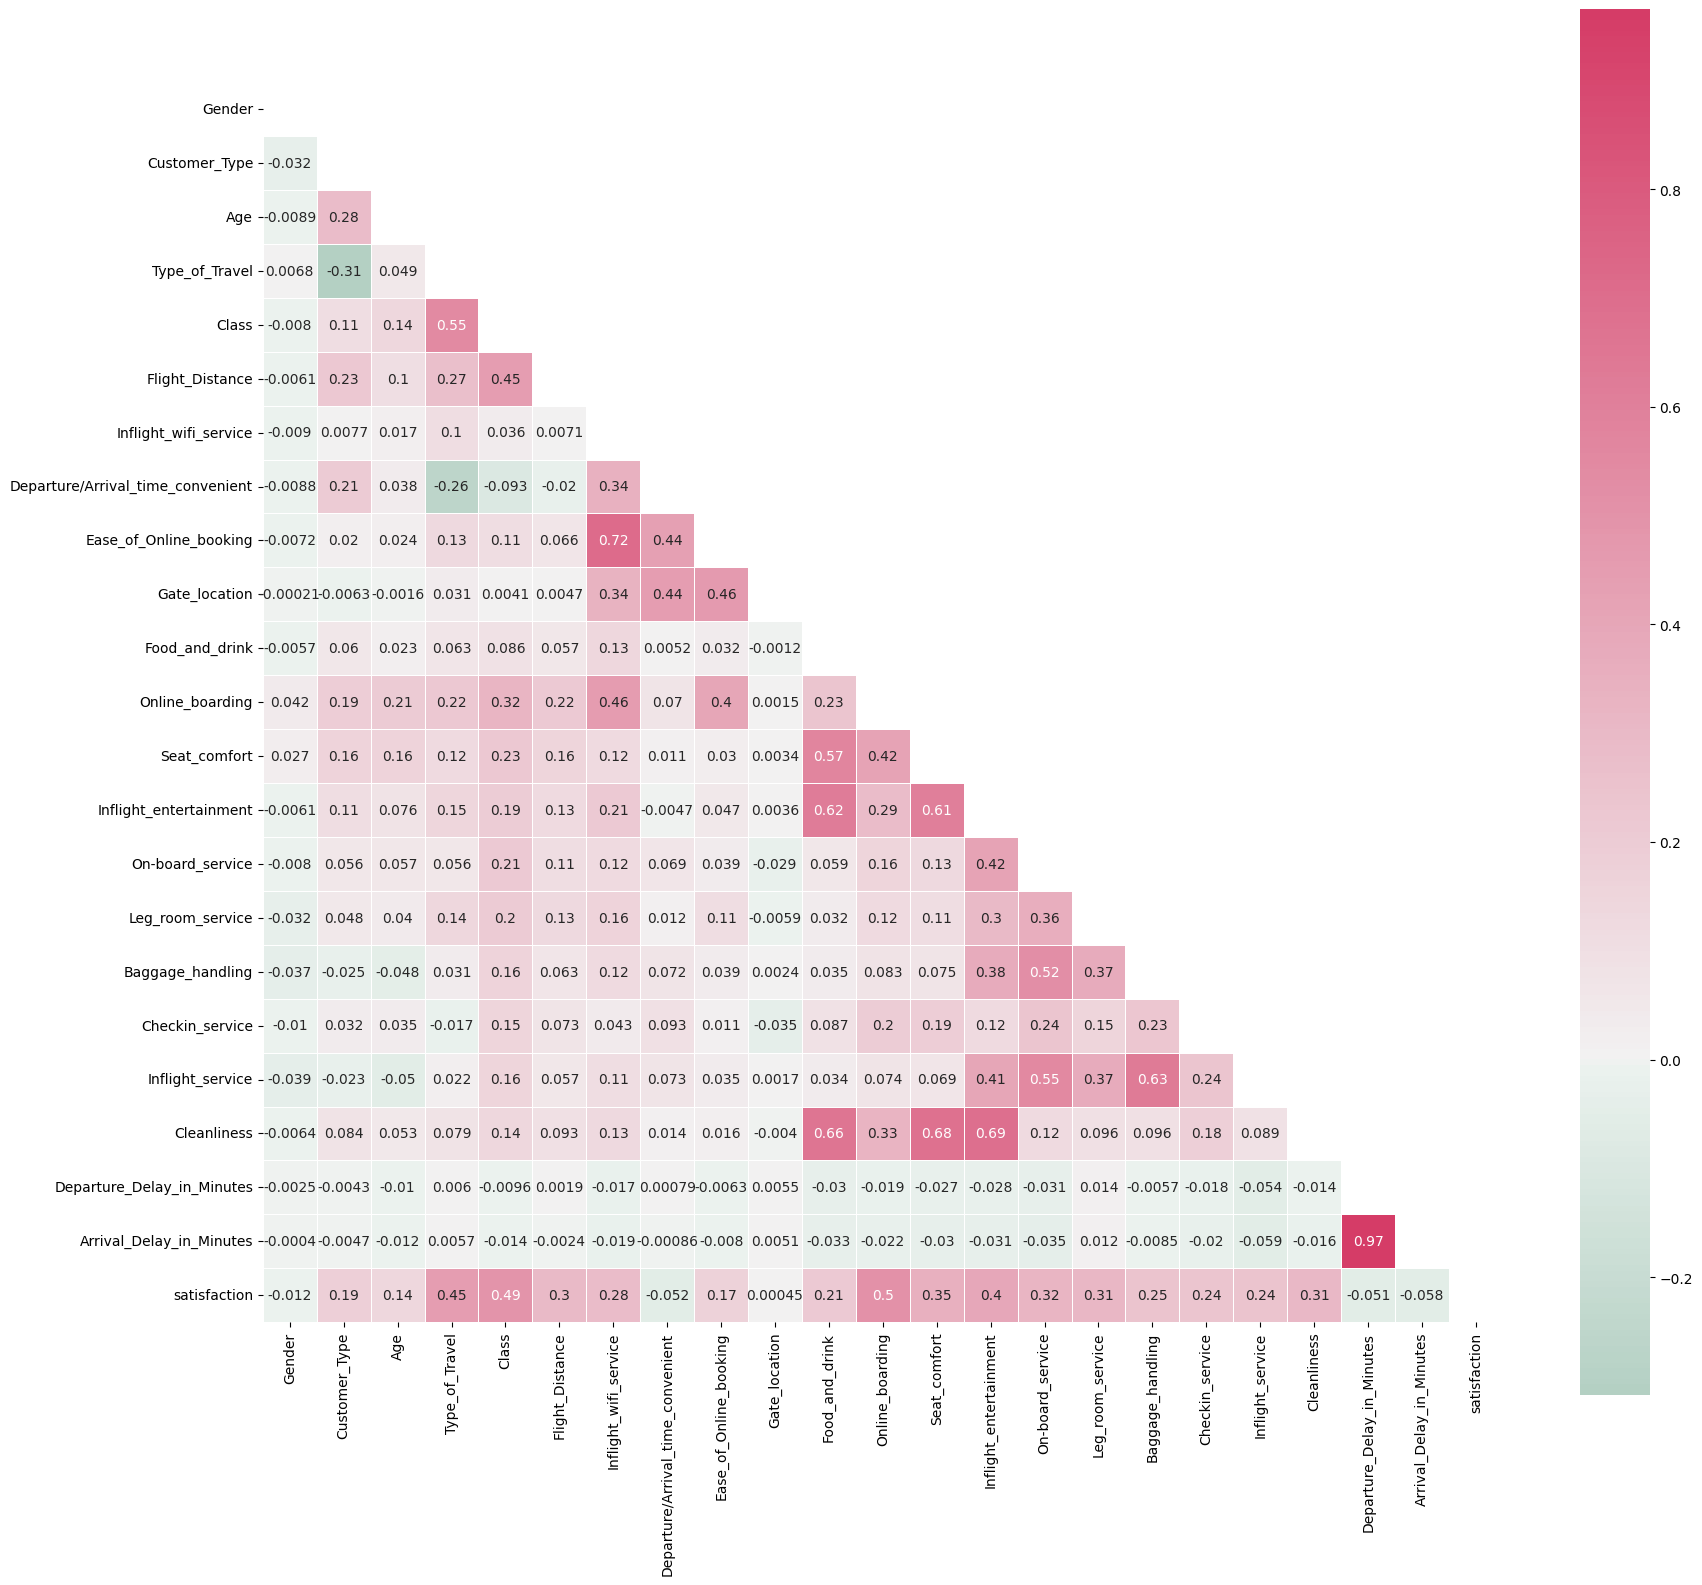

In [56]:
corr = df2_Train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9},annot_kws={"size": 10})

In [57]:
df2_Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer_Type                      103594 non-null  int64  
 2   Age                                103594 non-null  int64  
 3   Type_of_Travel                     103594 non-null  int64  
 4   Class                              103594 non-null  int64  
 5   Flight_Distance                    103594 non-null  int64  
 6   Inflight_wifi_service              103594 non-null  int64  
 7   Departure/Arrival_time_convenient  103594 non-null  int64  
 8   Ease_of_Online_booking             103594 non-null  int64  
 9   Gate_location                      103594 non-null  int64  
 10  Food_and_drink                     103594 non-null  int64  
 11  Online_boarding                    103594 no

In [58]:
#"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service". Also "Inflight_service" is highly correlated 
#with "Baggage_handling". But no pair is having corr. coefficient exactly equal to 1. 
#So there is no perfect multicollinearity. Hence we are not discarding any variable.

Feature Scaling

In [59]:
X_train = df2_Train.drop('satisfaction', axis = 1)
y_train = df2_Train.satisfaction

X_test =df2_Test.drop('satisfaction', axis=1)
y_test = df2_Test.satisfaction

In [60]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

Model

In [61]:
#Random Forest

In [62]:
classifier1 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0,n_jobs=-1)
classifier1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)

In [63]:
y_pred = classifier1.predict(X_test)

In [144]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893





Confusion matrix : 
[[14229   299]
 [  663 10702]]


Accuracy score : 0.9628471015332329


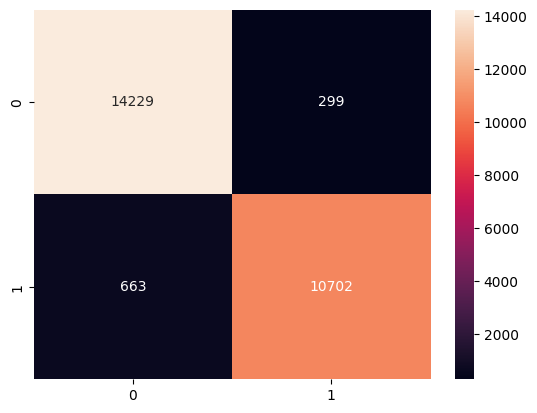

In [145]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [146]:
classifier2 = XGBClassifier(n_estimators = 500,n_jobs=-1)
classifier2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [147]:
y_pred_2 = classifier2.predict(X_test)

In [148]:

print(classification_report(y_test,y_pred_2))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred_2)))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14528
           1       0.97      0.95      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893





Confusion matrix : 
[[14229   299]
 [  663 10702]]


Accuracy score : 0.9617271077125091


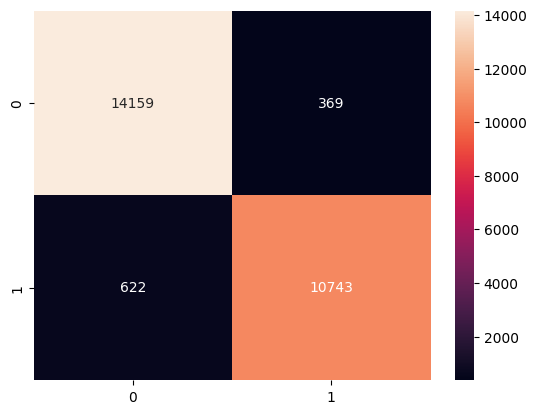

In [149]:
cm=confusion_matrix(y_test,y_pred_2)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [150]:
accuracy = []
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)
    accuracy.append(accuracy_i)

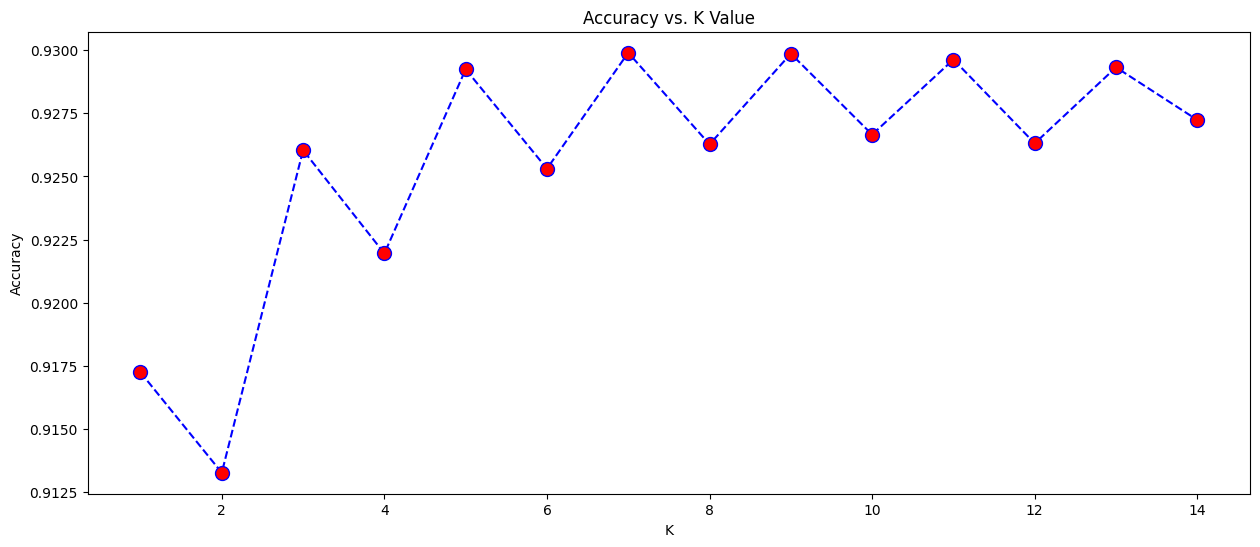

In [77]:
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [151]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred_4 = knn.predict(X_test)

In [152]:
print(classification_report(y_test,y_pred_4))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred_4)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred_4)))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14528
           1       0.95      0.88      0.92     11365

    accuracy                           0.93     25893
   macro avg       0.93      0.92      0.93     25893
weighted avg       0.93      0.93      0.93     25893





Confusion matrix : 
[[14022   506]
 [ 1309 10056]]


Accuracy score : 0.9299038350133241


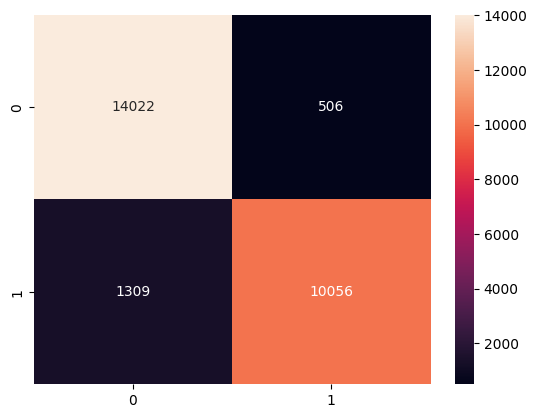

In [153]:
cm=confusion_matrix(y_test,y_pred_4)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()